花香---0.571396
果香---0.349017
清新---0.229214
淡雅---0.179555
甜美---0.155721
清新自然---0.132127
水果---0.131347
甜甜的---0.124104
混合---0.105879
放松---0.103453
甜蜜---0.100281
浓淡---0.094788
愉悦---0.088252
蜜瓜---0.086905
黄瓜---0.083360
果味---0.082092
女性化---0.076085
哈密瓜---0.076085
牛奶---0.074286
柔软---0.072782
精油---0.068961
花果---0.068100
舒缓---0.066189
柠檬---0.065056
糖果---0.062730
清爽---0.061464
迷人---0.060131
滋润---0.059466
清淡---0.058358
浓郁---0.057552
玫珑---0.055346
芬香---0.055346
青瓜---0.054728
温柔---0.054471
暗香---0.051818
甜香---0.049839
浓香---0.048928
四溢---0.046337
灵动---0.046244
阳光---0.045868
香草---0.044889
木瓜---0.044686
香精---0.044620
心情---0.044090
香甜---0.043954
年轻---0.042385
为辅---0.041411
青草---0.040497
清香---0.040497
植物---0.040390
优雅---0.040015
芳香---0.039469
适中---0.039322
玫瑰---0.039159
蜂蜜---0.039020
柔和---0.038793
廉价---0.038576
花朵---0.038402
弥漫---0.038219
浮动---0.037949
草本---0.037550
柑橘---0.036953
高档---0.036818
精致---0.036391
舒适---0.035602
可爱---0.035270
自然---0.035121
苹果---0.034881
花香调---0.032177
打泡---0.032177
薄荷香---0.032177

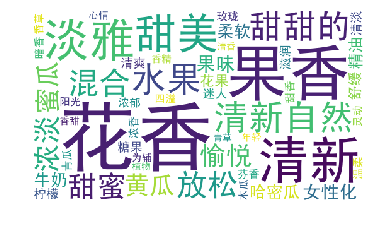

In [2]:
# -*- coding: utf-8 -*-

# ONE WASH SCRIPT

import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

file_path = '936.csv'

font_path = 'Simhei.ttf'

stopwords_path = 'stopword_master.txt'

bg_image_path = "bgimage.jpg"

        
def clean_using_stopword(text):
    """
    去除停顿词，利用常见停顿词表+自建词库
    :param text:
    :return:
    """
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/".join(seg_list)
    with open(stopwords_path) as f_stop:
        f_stop_text = f_stop.read()
     
    f_stop_seg_list = f_stop_text.split('\n')
    for myword in liststr.split('/'):  # 去除停顿词，生成新文档
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ''.join(mywordlist)


def preprocessing():
    """
    文本预处理
    :return:
    """
    df = pd.read_csv(file_path)
    with open('script_936.txt','w') as f:
        f.write(str(df[['评论内容']]))
    with open('script_936.txt','r') as f:
        content = f.read()
    return clean_using_stopword(content)
    return content

def extract_keywords():
    """
    利用jieba来进行中文分词。
    analyse.extract_tags采用TF-IDF算法进行关键词的提取。
    :return:
    """
    # 抽取1000个关键词，带权重，后面需要根据权重来生成词云
    allow_pos = ('nr',)  # 词性
    tags = jieba.analyse.extract_tags(preprocessing(), 1500, withWeight=True)
    header = ['word','frequency']
    tags_csv = pd.DataFrame(columns = header, data = tags)
    tags_csv.to_csv ('frequency_936.csv',encoding ='utf_8_sig')
    keywords = dict()
    for i in tags:
        print("%s---%f" % (i[0], i[1]))
        keywords[i[0]] = i[1]
    return keywords

def draw_wordcloud():
    """
    生成词云。1.配置WordCloud。2.plt进行显示
    :return:
    """
    back_coloring = plt.imread(bg_image_path)  # 设置背景图片
    # 设置词云属性
    wc = WordCloud(font_path=font_path,  # 设置字体
                   background_color="white",  # 背景颜色
                   max_words=50,  # 词云显示的最大词数
                   mask=back_coloring,  # 设置背景图片
                   random_state=42,
                   )

    # 根据频率生成词云
    wc.generate_from_frequencies(extract_keywords())
    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    # 保存到本地
    wc.to_file("wordcloud_936.jpg")


if __name__ == '__main__':
    draw_wordcloud()

花香---0.852399
浓淡---0.316939
浓郁---0.282239
玫瑰花---0.179565
水果---0.175672
甜味---0.148347
薰衣草---0.141372
好闻---0.137058
花果---0.121441
浓香型---0.112467
甜腻---0.112467
后调---0.111035
果香---0.107722
热带---0.104428
清新---0.102188
正好---0.100348
甜甜的---0.099591
淡雅---0.090056
芬芳---0.088525
香甜---0.088179
香水---0.086619
试用---0.083145
淡淡的---0.081855
混合---0.080919
太淡---0.074023
果味---0.073197
留香---0.072467
总结性---0.069731
浓香---0.065439
酸味---0.063714
特别---0.058796
百合---0.056029
夹杂着---0.055006
不太好---0.054570
甜蜜---0.053649
优雅---0.053518
木质---0.052732
玫瑰---0.052373
有种---0.051617
花朵---0.051361
草本---0.050221
浓度---0.047081
活力---0.046802
舒服---0.046630
放松---0.046122
适宜---0.044643
融合---0.044372
药枕---0.043036
浓淡适中---0.043036
花香调---0.043036
香香甜甜---0.043036
芭乐---0.043036
干净---0.042980
晨露---0.040890
高级---0.040495
享受---0.039729
鸢尾花---0.038744
包围住---0.038744
香香---0.037489
弄弄---0.037489
很甜---0.037489
闻不出---0.037012
助眠---0.037012
很腻---0.037012
潘婷---0.037012
香氛---0.037012
西柚味---0.037012
女香---0.037012
偏淡---0.037012
淡香---0.037012
后味-

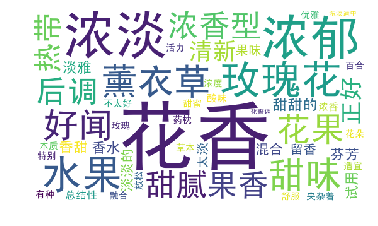

In [6]:
# -*- coding: utf-8 -*-

# FOUR WASH SCRIPT TASK3

import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

file_path = 'Product 2.csv'

font_path = 'Simhei.ttf'

stopwords_path = 'stopword_master.txt'

bg_image_path = "bgimage.jpg"

        
def clean_using_stopword(text):
    """
    去除停顿词，利用常见停顿词表+自建词库
    :param text:
    :return:
    """
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/".join(seg_list)
    with open(stopwords_path) as f_stop:
        f_stop_text = f_stop.read()
     
    f_stop_seg_list = f_stop_text.split('\n')
    for myword in liststr.split('/'):  # 去除停顿词，生成新文档
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ''.join(mywordlist)


def preprocessing():
    """
    文本预处理
    :return:
    """
    df = pd.read_csv(file_path)
    with open('script_four_wash_product_2_task3.txt','w') as f:
        f.write(str(df[['Task 3 对产品香味的描述']]))
    with open('script_four_wash_product_2_task3.txt','r') as f:
        content = f.read()
    return clean_using_stopword(content)
    return content

def extract_keywords():
    """
    利用jieba来进行中文分词。
    analyse.extract_tags采用TF-IDF算法进行关键词的提取。
    :return:
    """
    # 抽取1000个关键词，带权重，后面需要根据权重来生成词云
    allow_pos = ('nr',)  # 词性
    tags = jieba.analyse.extract_tags(preprocessing(), 1500, withWeight=True)
    header = ['word','frequency']
    tags_csv = pd.DataFrame(columns = header, data = tags)
    tags_csv.to_csv ('frequency_four_wash_product_2_task3.csv',encoding ='utf_8_sig')
    keywords = dict()
    for i in tags:
        print("%s---%f" % (i[0], i[1]))
        keywords[i[0]] = i[1]
    return keywords

def draw_wordcloud():
    """
    生成词云。1.配置WordCloud。2.plt进行显示
    :return:
    """
    back_coloring = plt.imread(bg_image_path)  # 设置背景图片
    # 设置词云属性
    wc = WordCloud(font_path=font_path,  # 设置字体
                   background_color="white",  # 背景颜色
                   max_words=50,  # 词云显示的最大词数
                   mask=back_coloring,  # 设置背景图片
                   random_state=42,
                   )

    # 根据频率生成词云
    wc.generate_from_frequencies(extract_keywords())
    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    # 保存到本地
    wc.to_file("wordcloud_four_wash_product_2_task3.jpg")


if __name__ == '__main__':
    draw_wordcloud()

场景---0.198683
粉色---0.197008
的花海---0.169935
图片---0.140270
玫瑰---0.124082
眼前---0.119763
红色---0.112824
颜色---0.111154
花朵---0.101404
闻着---0.087688
花海---0.086708
清新---0.080701
甜甜的---0.078650
玫瑰花---0.070904
草莓---0.070592
上传---0.070491
五颜六色---0.070099
美丽---0.068026
绿色---0.066722
女生---0.061978
鲜花---0.061853
紫色---0.061670
一束花---0.061195
大自然---0.059447
图一---0.057806
薰衣草---0.055823
甜品---0.055069
放松---0.054635
水果---0.052025
一副---0.049043
花丛---0.048943
花园里---0.048844
精油---0.048559
理发店---0.048559
樱花---0.048468
白色---0.047772
形象---0.047039
愉悦---0.046607
口感---0.046546
森林---0.046481
香甜---0.046425
花香---0.046425
一张---0.044010
淡淡的---0.043096
蛋糕---0.042635
找到---0.041528
口味---0.041489
有种---0.040764
鲜艳---0.040689
花瓣---0.040526
散发---0.039343
黄色---0.035802
花园---0.035721
特别---0.034825
百香果---0.033987
写真集---0.033987
芭乐---0.033987
夏天---0.033659
热带---0.032988
海洋---0.032055
刨冰---0.031301
软糖---0.031301
气场---0.030598
比邻而居---0.030598
小姐姐---0.030598
太阳---0.030454
洗头房---0.030052
很甜---0.029606
车厘子---0.029229
满开---0.029229
冷艳

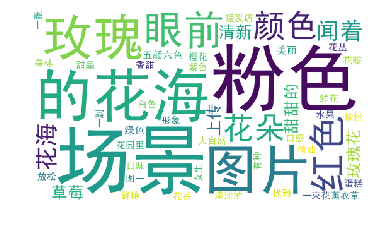

In [7]:
# -*- coding: utf-8 -*-

# FOUR WASH SCRIPT TASK4

import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

file_path = 'Product 2.csv'

font_path = 'Simhei.ttf'

stopwords_path = 'stopword_master.txt'

bg_image_path = "bgimage.jpg"

        
def clean_using_stopword(text):
    """
    去除停顿词，利用常见停顿词表+自建词库
    :param text:
    :return:
    """
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/".join(seg_list)
    with open(stopwords_path) as f_stop:
        f_stop_text = f_stop.read()
     
    f_stop_seg_list = f_stop_text.split('\n')
    for myword in liststr.split('/'):  # 去除停顿词，生成新文档
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ''.join(mywordlist)


def preprocessing():
    """
    文本预处理
    :return:
    """
    df = pd.read_csv(file_path)
    with open('script_four_wash_product_2_task4.txt','w') as f:
        f.write(str(df[['Task 4 对产品香味的联想']]))
    with open('script_four_wash_product_2_task4.txt','r') as f:
        content = f.read()
    return clean_using_stopword(content)
    return content

def extract_keywords():
    """
    利用jieba来进行中文分词。
    analyse.extract_tags采用TF-IDF算法进行关键词的提取。
    :return:
    """
    # 抽取1000个关键词，带权重，后面需要根据权重来生成词云
    allow_pos = ('nr',)  # 词性
    tags = jieba.analyse.extract_tags(preprocessing(), 1500, withWeight=True)
    header = ['word','frequency']
    tags_csv = pd.DataFrame(columns = header, data = tags)
    tags_csv.to_csv ('frequency_four_wash_product_2_task4.csv',encoding ='utf_8_sig')
    keywords = dict()
    for i in tags:
        print("%s---%f" % (i[0], i[1]))
        keywords[i[0]] = i[1]
    return keywords

def draw_wordcloud():
    """
    生成词云。1.配置WordCloud。2.plt进行显示
    :return:
    """
    back_coloring = plt.imread(bg_image_path)  # 设置背景图片
    # 设置词云属性
    wc = WordCloud(font_path=font_path,  # 设置字体
                   background_color="white",  # 背景颜色
                   max_words=50,  # 词云显示的最大词数
                   mask=back_coloring,  # 设置背景图片
                   random_state=42,
                   )

    # 根据频率生成词云
    wc.generate_from_frequencies(extract_keywords())
    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    # 保存到本地
    wc.to_file("wordcloud_four_wash_product_2_task4.jpg")


if __name__ == '__main__':
    draw_wordcloud()

花香---0.402067
浓淡---0.139851
浓郁---0.124540
玫瑰花---0.118851
场景---0.111013
粉色---0.110077
水果---0.106585
的花海---0.094950
薰衣草---0.093572
玫瑰---0.092440
清新---0.090183
甜甜的---0.087890
花朵---0.079323
甜味---0.078551
图片---0.078375
好闻---0.075597
眼前---0.066917
香甜---0.064849
热带---0.064512
红色---0.063040
颜色---0.062107
淡淡的---0.060199
花果---0.053587
芬芳---0.052083
香水---0.050962
放松---0.050879
浓香型---0.049627
甜腻---0.049627
后调---0.048995
闻着---0.048995
花海---0.048448
果香---0.047533
鲜花---0.046080
有种---0.045553
特别---0.045402
混合---0.044633
正好---0.044279
理发店---0.040698
樱花---0.040622
淡雅---0.039738
草莓---0.039443
上传---0.039386
五颜六色---0.039168
愉悦---0.039062
美丽---0.038009
芭乐---0.037980
绿色---0.037281
试用---0.036688
木质---0.034902
女生---0.034630
紫色---0.034457
一束花---0.034192
大自然---0.033216
很甜---0.033084
散发---0.032974
太淡---0.032663
1.1---0.032663
n1.2---0.032663
NaNNaNNaNNaN---0.032663
果味---0.032298
图一---0.032298
留香---0.031977
清新自然---0.031191
活力---0.030978
总结性---0.030769
甜品---0.030769
浓香---0.028876
汽水---0.028511
干净---0.028448
夏天---0.

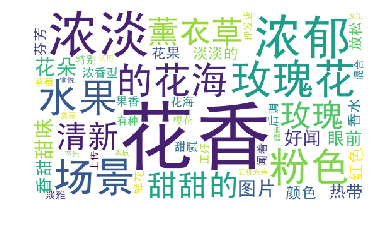

In [8]:
# -*- coding: utf-8 -*-

# FOUR WASH SCRIPT TASK3+4

import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

file_path = 'Product 2.csv'

font_path = 'Simhei.ttf'

stopwords_path = 'stopword_master.txt'

bg_image_path = "bgimage.jpg"

        
def clean_using_stopword(text):
    """
    去除停顿词，利用常见停顿词表+自建词库
    :param text:
    :return:
    """
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/".join(seg_list)
    with open(stopwords_path) as f_stop:
        f_stop_text = f_stop.read()
     
    f_stop_seg_list = f_stop_text.split('\n')
    for myword in liststr.split('/'):  # 去除停顿词，生成新文档
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ''.join(mywordlist)


def preprocessing():
    """
    文本预处理
    :return:
    """
    df = pd.read_csv(file_path)
    with open('script_four_wash_product_2_task3+4.txt','w') as f:
        f.write(str(df[['Task 3 对产品香味的描述','Task 4 对产品香味的联想']]))
    with open('script_four_wash_product_2_task3+4.txt','r') as f:
        content = f.read()
    return clean_using_stopword(content)
    return content

def extract_keywords():
    """
    利用jieba来进行中文分词。
    analyse.extract_tags采用TF-IDF算法进行关键词的提取。
    :return:
    """
    # 抽取1000个关键词，带权重，后面需要根据权重来生成词云
    allow_pos = ('nr',)  # 词性
    tags = jieba.analyse.extract_tags(preprocessing(), 1500, withWeight=True)
    header = ['word','frequency']
    tags_csv = pd.DataFrame(columns = header, data = tags)
    tags_csv.to_csv ('frequency_four_wash_product_2_task3+4.csv',encoding ='utf_8_sig')
    keywords = dict()
    for i in tags:
        print("%s---%f" % (i[0], i[1]))
        keywords[i[0]] = i[1]
    return keywords

def draw_wordcloud():
    """
    生成词云。1.配置WordCloud。2.plt进行显示
    :return:
    """
    back_coloring = plt.imread(bg_image_path)  # 设置背景图片
    # 设置词云属性
    wc = WordCloud(font_path=font_path,  # 设置字体
                   background_color="white",  # 背景颜色
                   max_words=50,  # 词云显示的最大词数
                   mask=back_coloring,  # 设置背景图片
                   random_state=42,
                   )

    # 根据频率生成词云
    wc.generate_from_frequencies(extract_keywords())
    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    # 保存到本地
    wc.to_file("wordcloud_four_wash_product_2_task3+4.jpg")


if __name__ == '__main__':
    draw_wordcloud()

喜欢---1.208608
精油---0.355715
花香---0.283402
卡诗---0.249801
护发---0.228936
发乳---0.184294
资生堂---0.183451
发膜---0.178429
滋养---0.164140
施华蔻---0.142743
密语---0.135352
留置---0.134467
地方---0.131818
护发乳---0.124484
fino---0.107058
欧莱雅---0.091449
还用---0.076947
蛋白---0.071551
多效---0.071372
净澄水活---0.071372
潘婷---0.071372
排浊---0.071372
诗恒护---0.071372
1.1---0.071372
留香---0.069871
修复---0.067961
修护---0.066822
强韧---0.066436
好闻---0.066074
丰盈---0.064270
柔顺---0.063538
袋鼠---0.062114
刺鼻---0.057711
蓬松---0.055739
白金---0.055496
喜好---0.054766
浓烈---0.052841
有种---0.049768
浓郁---0.049478
时有---0.047750
双重---0.044818
有用---0.043538
水果---0.042345
护理产品---0.039425
吹头发---0.038215
太俗---0.037356
香水味---0.036146
很甜---0.036146
三谷---0.035686
不喜---0.035686
马油---0.035686
闻上---0.035686
施华蔻润---0.035686
多芬---0.035686
polagrowingshot---0.035686
botanist---0.035686
紫吕---0.035686
深透---0.035686
诗小铺---0.035686
总得来说---0.035686
Aussi---0.035686
修护液---0.035686
润养润---0.035686
金致润---0.035686
凝润---0.035686
我用---0.035686
奢极---0.035686
卡诗丝---0.035686
韧焕活

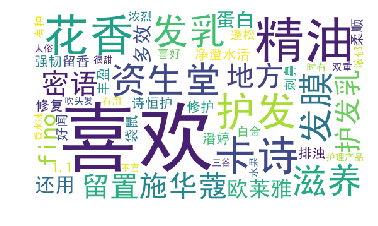

In [4]:
# -*- coding: utf-8 -*-

# uniqueness

import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

file_path = 'Product 2.csv'

font_path = 'Simhei.ttf'

stopwords_path = 'stopword_master.txt'

bg_image_path = "bgimage.jpg"

        
def clean_using_stopword(text):
    """
    去除停顿词，利用常见停顿词表+自建词库
    :param text:
    :return:
    """
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/".join(seg_list)
    with open(stopwords_path) as f_stop:
        f_stop_text = f_stop.read()
     
    f_stop_seg_list = f_stop_text.split('\n')
    for myword in liststr.split('/'):  # 去除停顿词，生成新文档
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ''.join(mywordlist)


def preprocessing():
    """
    文本预处理
    :return:
    """
    df = pd.read_csv(file_path)
    with open('script_uniqueness_product_2.txt','w') as f:
        f.write(str(df[['task 2 产品香味的整体喜好度']]))
    with open('script_uniqueness_product_2.txt','r') as f:
        content = f.read()
    return clean_using_stopword(content)
    return content

def extract_keywords():
    """
    利用jieba来进行中文分词。
    analyse.extract_tags采用TF-IDF算法进行关键词的提取。
    :return:
    """
    # 抽取1000个关键词，带权重，后面需要根据权重来生成词云
    allow_pos = ('nr',)  # 词性
    tags = jieba.analyse.extract_tags(preprocessing(), 1500, withWeight=True)
    header = ['word','frequency']
    tags_csv = pd.DataFrame(columns = header, data = tags)
    tags_csv.to_csv ('frequency_uniqueness_product_2.csv',encoding ='utf_8_sig')
    keywords = dict()
    for i in tags:
        print("%s---%f" % (i[0], i[1]))
        keywords[i[0]] = i[1]
    return keywords

def draw_wordcloud():
    """
    生成词云。1.配置WordCloud。2.plt进行显示
    :return:
    """
    back_coloring = plt.imread(bg_image_path)  # 设置背景图片
    # 设置词云属性
    wc = WordCloud(font_path=font_path,  # 设置字体
                   background_color="white",  # 背景颜色
                   max_words=50,  # 词云显示的最大词数
                   mask=back_coloring,  # 设置背景图片
                   random_state=42,
                   )

    # 根据频率生成词云
    wc.generate_from_frequencies(extract_keywords())
    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    # 保存到本地
    wc.to_file("wordcloud_uniquenessh_product_2.jpg")


if __name__ == '__main__':
    draw_wordcloud()